<a href="https://colab.research.google.com/github/IsaacBrrP/LogicaProgramacionMachineLearning/blob/main/Muestreo_Estratificado_prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Muestreo aleatorio simple

En este código se muestran unos ejemplos en los cuales se aplica un muestreo aleatorio simple a diferentes conjuntos de datos. Los conjuntos de datos se encuentran en el espacion R^2, con la finalidad de poder visualizarse de forma sencilla. También se hacen algunas pruebas en las cuales se aplican algoritmos de aprendizaje máquina para comparar las diferencias entre el conjunto original y le conjunto sub-muestreado con aleatorio simple.

## Ejemplo 1: conjunto de datos balanceado con una dispersión normal y tres clases

### Construcción de la Población simulada

Se construye con conjunto de datos con un total de 500 instancias, distribuidas de forma equitativa entre las clases.

In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [ ]:
from sklearn.datasets import make_blobs

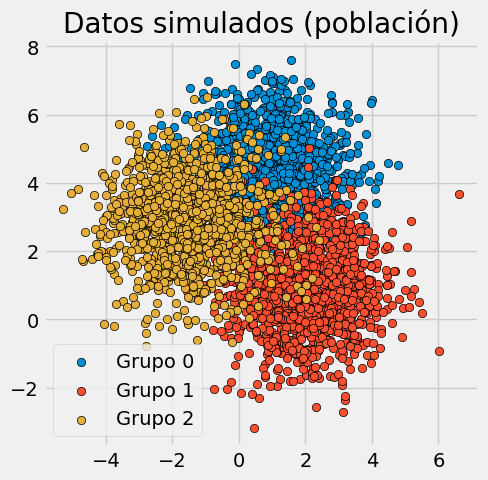

In [ ]:
#Datos simulados
# ==============================================================================
#data, lables =
X, y = make_blobs(
        n_samples    = 4000,
        n_features   = 2,
        centers      = 3,
        cluster_std  = 1.2,
        shuffle      = True,
        random_state = 0
       )

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for i in np.unique(y):
    ax.scatter(
        x = X[y == i, 0],
        y = X[y == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Grupo {i}"
    )

ax.set_title('Datos simulados (población)')
ax.legend()
plt.show()

### Construcción de una muestra de la población

Se procede a construir una Muestra de la Población. Para el ejemplo, la muestra tendrá un 10% del tamaño de la población (se puede variar este procentaje para observar el impacto en los resultados). Para ello, los datos son transformados a un Pandas Dataframe, para usar la función de "sample" para aplicar el muestreo aleatorio simple.

In [ ]:
#se construye un dataframe de pandas a partir del arreglo X de datos
df_poblacion1 = pd.DataFrame(X)

In [ ]:
#Se añade la columna clase al dataframe
df_poblacion1['class'] = pd.DataFrame(y)
df_poblacion1

,0,1,class
0,0.314074,5.472172,2
1,-0.409291,3.803835,2
2,1.213831,5.602110,0
3,2.394482,-0.413385,1
4,1.723293,3.546357,0
...,...,...,...
3995,0.508635,-0.324877,1
3996,0.827891,4.909751,0
3997,1.947286,2.866076,0
3998,0.581901,3.750197,2


In [ ]:
statistics_global = []
delta = 100
df_sample_n = pd.DataFrame()
df_pob = df_poblacion1.copy()

for i in range(delta, 4000, delta):
    #se genera una muestra de la poblacion
    df_tmp = df_pob.sample(n = delta) #muestreo aleatorio simple
    df_sample_n = pd.concat([df_sample_n, df_tmp])
    #se eliminan los registros de la muestra de la población
    df_pob = df_poblacion1.drop(df_tmp.index)
    #se separan los datos por clases
    df_sample_classes = []
    for j in np.unique(df_sample_n['class']):
        df_sample_classes.append(df_sample_n[df_sample_n['class'] == j])

    #se calcula la media de cada columna de df_sample_classes
    for k in range(len(df_sample_classes)):
        statistics_global.append([df_sample_classes[k][0].mean(), df_sample_classes[k][1].mean(),k,i])

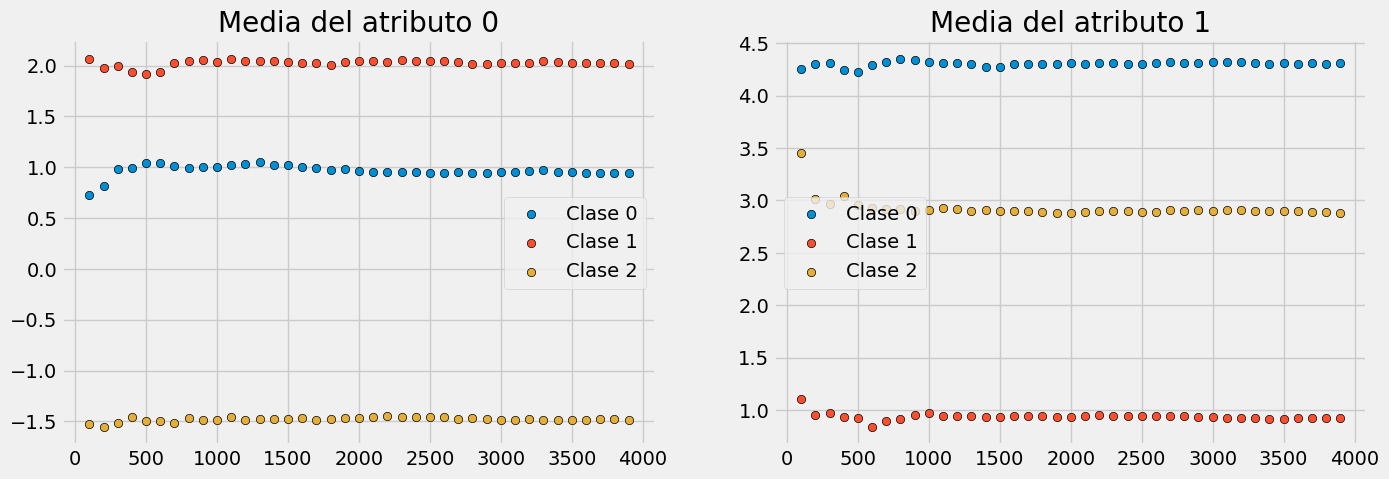

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax = ax.flatten()
for i in range(0,3):
    ax[0].scatter(
        x = [t[3] for t in statistics_global if t[2] == i],
        y = [t[0] for t in statistics_global if t[2] == i],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Clase {i}"
    )
ax[0].set_title('Media del atributo 0')
ax[0].legend()

for i in range(0,3):
    ax[1].scatter(
        x = [t[3] for t in statistics_global if t[2] == i],
        y = [t[1] for t in statistics_global if t[2] == i],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Clase {i}"
    )

ax[1].set_title('Media del atributo 1')
ax[1].legend()
plt.show()

In [ ]:
# ==============================================================================
# CONSTRUCCIÓN DE LA MUESTRA - MUESTREO ESTRATIFICADO
# ==============================================================================
# El muestreo estratificado garantiza que cada clase (estrato) esté
# representada en la muestra de forma PROPORCIONAL a su peso en la población.
# Esto elimina el sesgo de representación que puede introducir el MAS.
# ==============================================================================

In [13]:
# CONSTRUCCION DE LA MUESTRA
# Aquí se define el tamaño de la muestra a generar
df_sample1 = df_poblacion1.sample(n = 1700)
# Nota: el experimento son con los parametros de la población discutida en clase, con un factor de cambio del tamaño de la muestra = 20,
# iniciando en 20
# 1. separar los datos en df_sample1 en estratos (clase = 0, 1, 2)
# 2. Calcular la media y desv estandar de cada dimension de cada estrato

df_sample1

,0,1,class
429,-1.669296,2.384014,2
2281,0.636743,0.038250,1
3812,-0.608634,3.113641,2
447,0.157044,3.310174,2
1080,-0.057189,3.692273,0
...,...,...,...
2991,1.523654,3.874692,0
2745,0.633119,6.100081,0
554,2.267538,-0.407954,1
3661,1.635638,0.092753,1


In [14]:
# --- Parámetros ---
TAMANIO_MUESTRA = 1700          # Mismo tamaño que el MAS para comparación directa
RANDOM_STATE    = 42            # Semilla para reproducibilidad

# --- Paso 1: Calcular la fracción de muestreo ---
fraccion_muestreo = TAMANIO_MUESTRA / len(df_poblacion1)
print(f"Fracción de muestreo: {fraccion_muestreo:.4f} ({fraccion_muestreo*100:.2f}%)")

Fracción de muestreo: 0.4250 (42.50%)


In [15]:
# --- Paso 2: Construir la muestra estratificada por clase ---
# Se aplica .sample(frac=...) a cada estrato (groupby 'class')
# Esto asegura proporcionalidad exacta por clase.
df_sample_estratificado = (
    df_poblacion1
    .groupby('class', group_keys=False)
    .apply(lambda estrato: estrato.sample(frac=fraccion_muestreo, random_state=RANDOM_STATE))
)


/tmp/ipython-input-886198750.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda estrato: estrato.sample(frac=fraccion_muestreo, random_state=RANDOM_STATE))


In [16]:
# --- Paso 3: Verificación de la representación por estrato ---
print("\n--- Distribución en la POBLACIÓN ---")
print(df_poblacion1['class'].value_counts().sort_index().rename("n_poblacion").to_frame()
      .assign(proporcion_pob=lambda df: (df['n_poblacion'] / len(df_poblacion1)).round(4)))

print("\n--- Distribución en la MUESTRA ESTRATIFICADA ---")
resumen = df_sample_estratificado['class'].value_counts().sort_index().rename("n_muestra").to_frame()
resumen['proporcion_muestra'] = (resumen['n_muestra'] / len(df_sample_estratificado)).round(4)
print(resumen)

print(f"\nTotal en muestra estratificada: {len(df_sample_estratificado)} instancias")


--- Distribución en la POBLACIÓN ---
       n_poblacion  proporcion_pob
class                             
0             1334          0.3335
1             1333          0.3332
2             1333          0.3332

--- Distribución en la MUESTRA ESTRATIFICADA ---
       n_muestra  proporcion_muestra
class                               
0            567              0.3333
1            567              0.3333
2            567              0.3333

Total en muestra estratificada: 1701 instancias


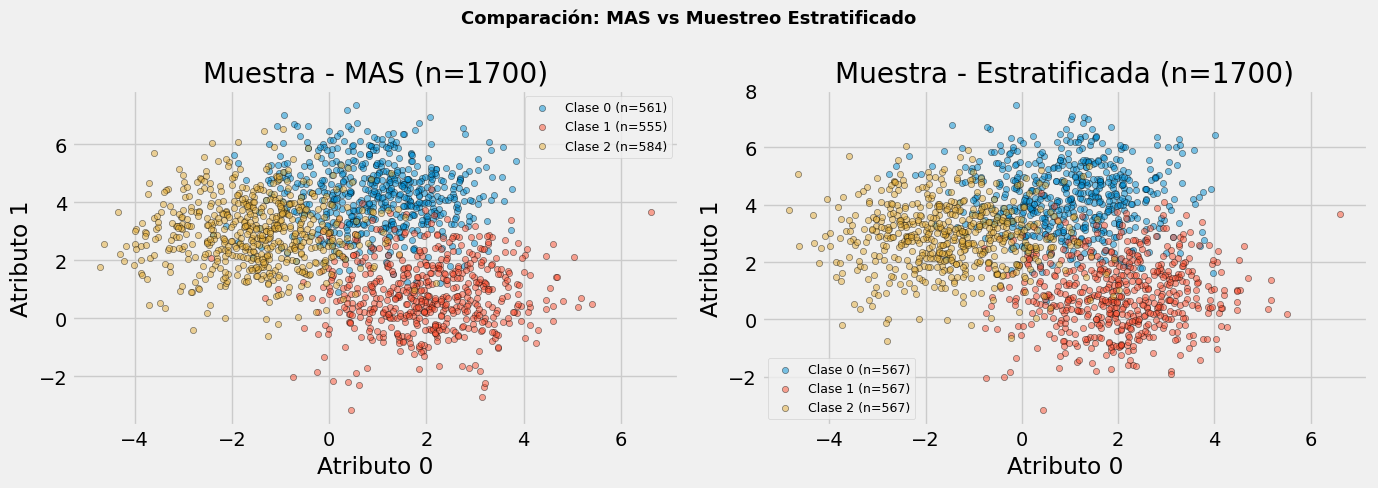

In [17]:
# --- Paso 4: Visualización comparativa MAS vs Estratificado ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Colores del ciclo de matplotlib
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for idx, (df_plot, titulo) in enumerate([
    (df_sample1,               'Muestra - MAS (n=1700)'),
    (df_sample_estratificado,  'Muestra - Estratificada (n=1700)')
]):
    ax = axes[idx]
    for clase in sorted(df_plot['class'].unique()):
        subset = df_plot[df_plot['class'] == clase]
        ax.scatter(
            x         = subset[0],
            y         = subset[1],
            c         = colors[clase],
            marker    = 'o',
            edgecolor = 'black',
            alpha     = 0.5,
            s         = 20,
            label     = f"Clase {clase} (n={len(subset)})"
        )
    ax.set_title(titulo)
    ax.legend(fontsize=9)
    ax.set_xlabel('Atributo 0')
    ax.set_ylabel('Atributo 1')

plt.suptitle('Comparación: MAS vs Muestreo Estratificado', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

In [18]:
# --- Paso 5: Comparación de estadísticas descriptivas por clase ---
print("\n--- Medias por clase en la POBLACIÓN ---")
print(df_poblacion1.groupby('class')[[0, 1]].mean().round(4))

print("\n--- Medias por clase en la MUESTRA MAS ---")
print(df_sample1.groupby('class')[[0, 1]].mean().round(4))

print("\n--- Medias por clase en la MUESTRA ESTRATIFICADA ---")
print(df_sample_estratificado.groupby('class')[[0, 1]].mean().round(4))


--- Medias por clase en la POBLACIÓN ---
            0       1
class                
0      0.9382  4.2893
1      2.0228  0.8981
2     -1.5222  2.8958

--- Medias por clase en la MUESTRA MAS ---
            0       1
class                
0      0.9879  4.2718
1      2.0211  0.8365
2     -1.5229  2.9499

--- Medias por clase en la MUESTRA ESTRATIFICADA ---
            0       1
class                
0      0.9932  4.2657
1      2.0321  0.8732
2     -1.4974  2.8894


In [19]:
# ==============================================================================
# CONSTRUCCIÓN ROBUSTA DE TRAIN / TEST
# Desde muestra estratificada - Buenas prácticas MLOps
# ==============================================================================

In [20]:
from sklearn.model_selection import train_test_split

In [23]:
#==============================================================================
# PASO 1: Separar features (X) y etiquetas (y) desde la muestra estratificada
# ==============================================================================
X_muestra = df_sample_estratificado[[0, 1]].values   # atributos numéricos → numpy array
y_muestra = df_sample_estratificado['class'].values   # etiquetas

print("=" * 55)
print("        INFORMACIÓN DE LA MUESTRA ESTRATIFICADA")
print("=" * 55)
print(f"  Total instancias : {len(X_muestra)}")
print(f"  Features shape   : {X_muestra.shape}")
print(f"  Clases únicas    : {np.unique(y_muestra)}")
print("=" * 55)

        INFORMACIÓN DE LA MUESTRA ESTRATIFICADA
  Total instancias : 1701
  Features shape   : (1701, 2)
  Clases únicas    : [0 1 2]


In [24]:
# ==============================================================================
# PASO 2: Split estratificado Train / Test
# - test_size   = 0.30  → 70% train | 30% test  (proporción estándar en la industria)
# - stratify    = y     → CRÍTICO: mantiene proporciones de clase en ambos sets
# - random_state= 42    → reproducibilidad garantizada
# ==============================================================================
TEST_SIZE    = 0.30
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(
    X_muestra,
    y_muestra,
    test_size    = TEST_SIZE,
    stratify     = y_muestra,   # ← garantiza proporcionalidad en train Y test
    random_state = RANDOM_STATE
)

In [25]:
# ==============================================================================
# PASO 3: Verificación cuantitativa del split
# ==============================================================================
def reporte_distribucion(y_array, nombre, y_total):
    """Imprime la distribución de clases de un conjunto."""
    clases, conteos = np.unique(y_array, return_counts=True)
    print(f"\n  {'Clase':<8} {'n':>6} {'% conjunto':>12} {'% población':>13}")
    print(f"  {'-'*42}")
    for clase, conteo in zip(clases, conteos):
        pct_conj = conteo / len(y_array) * 100
        pct_pob  = conteo / len(y_total) * 100
        print(f"  {clase:<8} {conteo:>6} {pct_conj:>11.2f}% {pct_pob:>12.2f}%")
    print(f"  {'TOTAL':<8} {len(y_array):>6} {'100.00%':>12} {len(y_array)/len(y_total)*100:>12.2f}%")

print("\n" + "=" * 55)
print("         VERIFICACIÓN DEL SPLIT")
print("=" * 55)

print(f"\n📦 TRAIN  ({(1-TEST_SIZE)*100:.0f}%  →  {len(X_train)} instancias)")
reporte_distribucion(y_train, "TRAIN", y_muestra)

print(f"\n🧪 TEST   ({TEST_SIZE*100:.0f}%  →  {len(X_test)} instancias)")
reporte_distribucion(y_test, "TEST", y_muestra)



         VERIFICACIÓN DEL SPLIT

📦 TRAIN  (70%  →  1190 instancias)

  Clase         n   % conjunto   % población
  ------------------------------------------
  0           397       33.36%        23.34%
  1           397       33.36%        23.34%
  2           396       33.28%        23.28%
  TOTAL      1190      100.00%        69.96%

🧪 TEST   (30%  →  511 instancias)

  Clase         n   % conjunto   % población
  ------------------------------------------
  0           170       33.27%         9.99%
  1           170       33.27%         9.99%
  2           171       33.46%        10.05%
  TOTAL       511      100.00%        30.04%


In [26]:
# ==============================================================================
# PASO 4: Verificación estadística — medias y desv. estándar por split
# Principio: Train y Test deben tener estadísticas similares (no data leakage)
# ==============================================================================
print("\n" + "=" * 55)
print("      VERIFICACIÓN ESTADÍSTICA (Anti Data-Leakage)")
print("=" * 55)

df_train_check = pd.DataFrame(X_train, columns=['atr_0', 'atr_1'])
df_train_check['split'] = 'TRAIN'
df_train_check['class'] = y_train

df_test_check  = pd.DataFrame(X_test,  columns=['atr_0', 'atr_1'])
df_test_check['split'] = 'TEST'
df_test_check['class'] = y_test

df_check = pd.concat([df_train_check, df_test_check])

stats = df_check.groupby(['split', 'class'])[['atr_0', 'atr_1']].agg(['mean', 'std']).round(4)
print(stats.to_string())

print("\n✅ Si las medias de TRAIN y TEST son similares por clase,")
print("   el split es estadísticamente representativo.")


      VERIFICACIÓN ESTADÍSTICA (Anti Data-Leakage)
              atr_0           atr_1        
               mean     std    mean     std
split class                                
TEST  0      0.9886  1.1695  4.0976  1.1114
      1      2.1190  1.2238  0.7521  1.2824
      2     -1.4191  1.2763  2.7626  1.1965
TRAIN 0      0.9952  1.1845  4.3377  1.1851
      1      1.9950  1.1697  0.9250  1.2019
      2     -1.5312  1.2353  2.9442  1.1155

✅ Si las medias de TRAIN y TEST son similares por clase,
   el split es estadísticamente representativo.


/tmp/ipython-input-1244556561.py:35: UserWarning: Glyph 128998 (\N{LARGE BLUE SQUARE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1244556561.py:35: UserWarning: Glyph 128997 (\N{LARGE RED SQUARE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1244556561.py:35: UserWarning: Glyph 11035 (\N{BLACK LARGE SQUARE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128998 (\N{LARGE BLUE SQUARE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128997 (\N{LARGE RED SQUARE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11035 (\N{BLACK LARGE SQUARE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figur

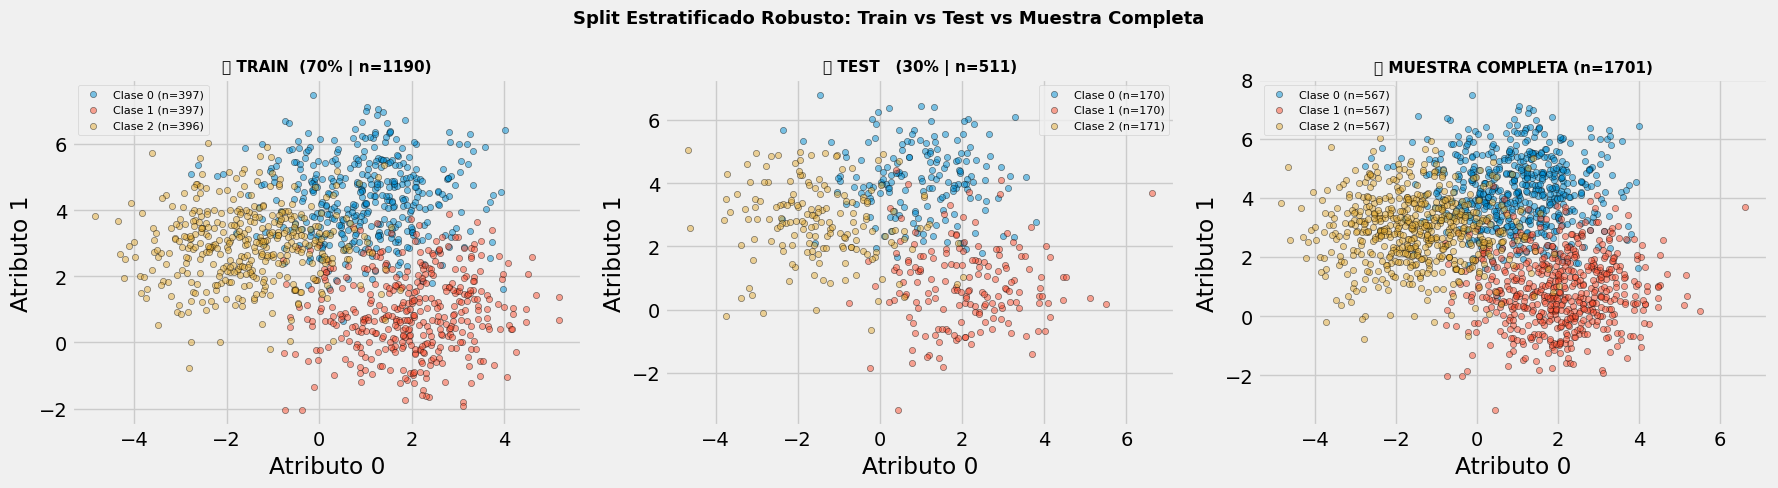

In [27]:
# ==============================================================================
# PASO 5: Visualización comparativa Train vs Test
# ==============================================================================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

datasets = [
    (X_train, y_train, '🟦 TRAIN  (70% | n={})'.format(len(X_train))),
    (X_test,  y_test,  '🟥 TEST   (30% | n={})'.format(len(X_test))),
    (X_muestra, y_muestra, '⬛ MUESTRA COMPLETA (n={})'.format(len(X_muestra)))
]

for ax, (X_plot, y_plot, titulo) in zip(axes, datasets):
    for clase in np.unique(y_plot):
        mask = y_plot == clase
        ax.scatter(
            X_plot[mask, 0],
            X_plot[mask, 1],
            c         = colors[clase],
            marker    = 'o',
            edgecolor = 'black',
            alpha     = 0.5,
            s         = 20,
            label     = f"Clase {clase} (n={mask.sum()})"
        )
    ax.set_title(titulo, fontsize=11, fontweight='bold')
    ax.set_xlabel('Atributo 0')
    ax.set_ylabel('Atributo 1')
    ax.legend(fontsize=8)

plt.suptitle(
    'Split Estratificado Robusto: Train vs Test vs Muestra Completa',
    fontsize=13, fontweight='bold'
)
plt.tight_layout()
plt.show()